# WeatherPy
----

In [39]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [23]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

597

### Perform API Calls

In [29]:
# Elements to perform an API Call

url = "http://api.openweathermap.org/data/2.5/weather?q="
units = "imperial"

In [30]:
# Create a list for city ID based on the number of cities

city_id = [x for x in range(len(cities))]

# Create empty lists to store the information

cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
temp = []
wind_speed = []

In [31]:
# Loop throught the call 

print("Beginning Data Retrieval")     
print("-----------------------------")
for city in cities:
    response = requests.get(url + city + "&appid=" + weather_api_key + "&units=" + units).json()
    
    try:
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        temp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
        print(f"Processing Record {cities.index(city) + 1} | {city.title()}")
    except:
        print("City not found. Skipping...")
    time.sleep(2)

Beginning Data Retrieval
-----------------------------
Processing Record 1 | New Norfolk
Processing Record 2 | Kaniama
Processing Record 3 | Vestmannaeyjar
Processing Record 4 | Pacific Grove
City not found. Skipping...
Processing Record 6 | Nemuro
Processing Record 7 | Solnechnyy
Processing Record 8 | Cape Town
Processing Record 9 | Boden
City not found. Skipping...
Processing Record 11 | Chichigalpa
Processing Record 12 | Ushuaia
Processing Record 13 | Gladstone
Processing Record 14 | Deputatskiy
Processing Record 15 | Kahului
Processing Record 16 | Methoni
Processing Record 17 | Hilo
Processing Record 18 | Albany
Processing Record 19 | Hobart
Processing Record 20 | Laguna
Processing Record 21 | Victoria
Processing Record 22 | Hithadhoo
Processing Record 23 | Alushta
Processing Record 24 | Qaanaaq
Processing Record 25 | Dno
Processing Record 26 | Asfi
Processing Record 27 | Arraial Do Cabo
Processing Record 28 | Homer
Processing Record 29 | Rikitea
Processing Record 30 | Busselton
Pr

Processing Record 252 | Buchanan
Processing Record 253 | Charters Towers
Processing Record 254 | Adet
Processing Record 255 | Carutapera
Processing Record 256 | Bani Walid
Processing Record 257 | Orel-Izumrud
Processing Record 258 | Constanta
Processing Record 259 | Bambous Virieux
City not found. Skipping...
Processing Record 261 | Norilsk
City not found. Skipping...
Processing Record 263 | Pidhaytsi
Processing Record 264 | Berlevag
Processing Record 265 | Dhangadhi
Processing Record 266 | Gamba
Processing Record 267 | Sept-Iles
Processing Record 268 | Ilulissat
Processing Record 269 | Juneau
Processing Record 270 | Ketchikan
Processing Record 271 | Yanam
Processing Record 272 | Lezajsk
Processing Record 273 | Sembakung
Processing Record 274 | Novoagansk
Processing Record 275 | Taitung
Processing Record 276 | Kaitangata
Processing Record 277 | Miri
Processing Record 278 | Narsaq
Processing Record 279 | Cabedelo
Processing Record 280 | Vostok
Processing Record 281 | Ahuimanu
Processing

Processing Record 501 | Linfen
Processing Record 502 | Nuevo Progreso
City not found. Skipping...
Processing Record 504 | Sydney Mines
Processing Record 505 | Ayapel
Processing Record 506 | Yanji
Processing Record 507 | Barra
Processing Record 508 | Mount Isa
Processing Record 509 | Ruteng
Processing Record 510 | Buique
Processing Record 511 | Ankara
Processing Record 512 | Axim
Processing Record 513 | Kalanchak
Processing Record 514 | Genhe
Processing Record 515 | Sisimiut
Processing Record 516 | Dolores
Processing Record 517 | Touros
Processing Record 518 | Kendari
Processing Record 519 | Silver City
Processing Record 520 | Whitehorse
City not found. Skipping...
Processing Record 522 | Medea
Processing Record 523 | Port Blair
Processing Record 524 | Trairi
Processing Record 525 | Roma
Processing Record 526 | Popondetta
Processing Record 527 | Miguel Calmon
Processing Record 528 | El Alto
Processing Record 529 | Jiwani
Processing Record 530 | Teshie
Processing Record 531 | Grand Gaube

### Convert Raw Data to DataFrame


In [47]:
# Dependencies to export the information into a .csv
import os
import csv

In [248]:
# Zip the lists
raw_data_csv = zip(city_id, cities, cloudiness, country, date, humidity, lat, lng, temp, wind_speed)

In [249]:
# Path for the new file
output_data_file = os.path.join("cities.csv") 

In [250]:
# Create a new csv
with open(output_data_file, "w") as csvfile:
    csv_writer = csv.writer(csvfile)
    csv_writer.writerow(["City_ID","City", "Cloudiness", "Country", "Date", "Humidity", "Lat","Lng", "Max Temp", "Wind Speed"])
    csv_writer.writerows(raw_data_csv)

In [251]:
# Read in the cities temperature data
cities_temperature_df = pd.read_csv(output_data_file)
organized_cities_temperature_df = cities_temperature_df[["City", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed", "Country", "Date"]]
organized_cities_temperature_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,new norfolk,-42.78,147.06,61.00,65,0,3.00,AU,1602036388
1,kaniama,-7.57,24.18,68.50,79,4,1.83,CD,1602036390
2,vestmannaeyjar,63.44,-20.27,43.61,80,100,2.93,IS,1602036392
3,pacific grove,36.62,-121.92,63.00,87,40,3.67,US,1602036229
4,barentsburg,43.32,145.57,62.60,59,20,8.05,JP,1602036399


In [252]:
# Check the number of values of the fields
organized_cities_temperature_df.count()

City          547
Lat           547
Lng           547
Max Temp      547
Humidity      547
Cloudiness    547
Wind Speed    547
Country       541
Date          547
dtype: int64

In [253]:
# Drop the NA values 
organized_cities_temperature_df.dropna(inplace=True)
organized_cities_temperature_df.count()

/Users/manuelamunoz/opt/anaconda3/envs/PythonData2/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


City          541
Lat           541
Lng           541
Max Temp      541
Humidity      541
Cloudiness    541
Wind Speed    541
Country       541
Date          541
dtype: int64

In [254]:
# Describe the data frame
organized_cities_temperature_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,5.410000e+02
mean,21.710518,19.942348,61.706580,73.715342,48.639556,7.809409,1.602037e+09
std,33.218568,91.492197,17.539294,19.722903,39.731849,5.681557,3.795473e+02
min,-54.800000,-175.200000,12.650000,7.000000,0.000000,0.340000,1.602036e+09
25%,-5.120000,-60.220000,49.510000,62.000000,4.000000,3.360000,1.602037e+09
50%,27.150000,25.570000,63.000000,79.000000,41.000000,6.800000,1.602037e+09
75%,48.920000,102.500000,77.000000,88.000000,90.000000,10.870000,1.602037e+09
max,78.220000,179.320000,93.200000,100.000000,100.000000,42.840000,1.602038e+09


## Inspect the data and remove the cities where the humidity > 100%.
----


In [255]:
#  Get the indices of cities that have humidity over 100%.
organized_cities_temperature_df.loc[organized_cities_temperature_df["Humidity"]>=100].index

Int64Index([  7,  66,  73,  79, 115, 169, 183, 267, 268, 334, 335, 354, 415,
            432, 439, 466, 497, 502, 527, 534],
           dtype='int64')

In [256]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = organized_cities_temperature_df.drop((organized_cities_temperature_df.loc[organized_cities_temperature_df["Humidity"]>=100].index), inplace=False)
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,new norfolk,-42.78,147.06,61.00,65,0,3.00,AU,1602036388
1,kaniama,-7.57,24.18,68.50,79,4,1.83,CD,1602036390
2,vestmannaeyjar,63.44,-20.27,43.61,80,100,2.93,IS,1602036392
3,pacific grove,36.62,-121.92,63.00,87,40,3.67,US,1602036229
4,barentsburg,43.32,145.57,62.60,59,20,8.05,JP,1602036399


## Plotting the Data


## Latitude vs. Temperature Plot

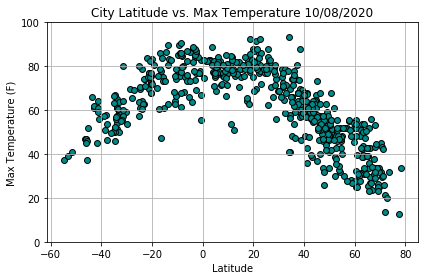

In [283]:
temperature_plot = organized_cities_temperature_df.plot(kind='scatter', x="Lat", y="Max Temp", marker="o", c="darkcyan", grid=True, s=35, edgecolor = "black")
temperature_plot.set_ylabel("Max Temperature (F)")
temperature_plot.set_xlabel("Latitude")
temperature_plot.set_title("City Latitude vs. Max Temperature 10/08/2020")
plt.ylim(0, 100)
plt.tight_layout()
plt.savefig("Images/max_temperature.png")

## Latitude vs. Humidity Plot

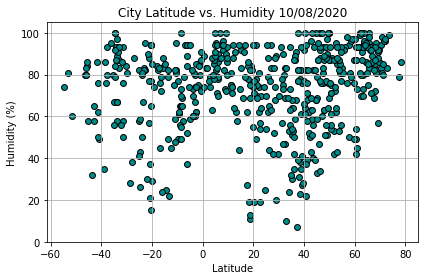

In [284]:
humidity_plot = organized_cities_temperature_df.plot(kind='scatter', x="Lat", y="Humidity", marker="o", c="darkcyan", grid=True, s=35, edgecolor = "black")
humidity_plot.set_ylabel("Humidity (%)")
humidity_plot.set_xlabel("Latitude")
humidity_plot.set_title("City Latitude vs. Humidity 10/08/2020")
plt.ylim(0, 105)
plt.tight_layout()
plt.savefig("Images/humidity.png")

The humidity plot is representing the humidity level on each location of the cities based on the latitude. There is not a defined tendency.

## Latitude vs. Cloudiness Plot

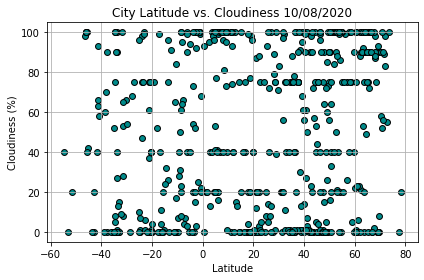

In [285]:
cloudiness_plot = organized_cities_temperature_df.plot(kind='scatter', x="Lat", y="Cloudiness", marker="o", c="darkcyan", grid=True, s=35, edgecolor = "black")
cloudiness_plot.set_ylabel("Cloudiness (%)")
cloudiness_plot.set_xlabel("Latitude")
cloudiness_plot.set_title("City Latitude vs. Cloudiness 10/08/2020")
plt.ylim(-5, 105)
plt.tight_layout()
plt.savefig("Images/cloudiness.png")

The cloudiness plot is representing the cloudiness level on each location of the cities based on the latitude. The plots are distributed around the whole chart area. There is not a defined tendency.

## Latitude vs. Wind Speed Plot

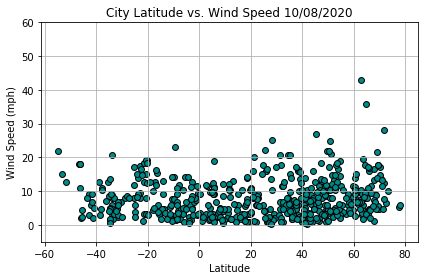

In [286]:
wind_plot = organized_cities_temperature_df.plot(kind='scatter', x="Lat", y="Wind Speed", marker="o", c="darkcyan", grid=True, s=35, edgecolor = "black")
wind_plot.set_ylabel("Wind Speed (mph)")
wind_plot.set_xlabel("Latitude")
wind_plot.set_title("City Latitude vs. Wind Speed 10/08/2020")
plt.ylim(-5, 60)
plt.tight_layout()
plt.savefig("Images/wind_speed.png")

The wind speed plot is representing the wind speed level on each location of the cities based on the latitude. There is a relationship between these two variables. It can be vizualied on elements as:
 - The information points are concentrated in the same zome
 - The wind speed dots are in an defined range. 

## Linear Regression

In [261]:
# Create a data frame base on the Latitud for Northern Hemisphere
nh_cities = organized_cities_temperature_df.loc[organized_cities_temperature_df["Lat"]>=0.0]
nh_cities.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,3.840000e+02
mean,39.347943,13.501589,58.967370,74.783854,51.403646,7.860964,1.602037e+09
std,20.038522,88.142647,18.420045,19.825812,40.098783,5.872900,3.734661e+02
min,0.490000,-173.300000,12.650000,7.000000,0.000000,0.340000,1.602036e+09
25%,22.652500,-65.877500,45.942500,64.000000,5.000000,3.395000,1.602037e+09
50%,41.190000,24.960000,59.000000,80.000000,56.000000,6.645000,1.602037e+09
75%,54.517500,87.090000,76.645000,89.250000,90.000000,10.502500,1.602037e+09
max,78.220000,179.320000,93.200000,100.000000,100.000000,42.840000,1.602038e+09


In [262]:
# Define a function for Northern Hemisphere

def nh_latitudlr(y_values):
    x_values = nh_cities["Lat"]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))
    plt.scatter(x_values, y_values, c="royalblue", edgecolor="black")
    plt.plot(x_values, regress_values,"springgreen")
    plt.xlabel("Latitude")
    plt.ylabel(y_values.name)
    plt.show()
    print(line_eq)
    print(f"The r-value is: {rvalue}")

In [263]:
# Create a data frame base on the Latitud for Southern Hemisphere
sh_cities = organized_cities_temperature_df.loc[organized_cities_temperature_df["Lat"]<0.0]
sh_cities.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,1.570000e+02
mean,-21.428153,35.695541,68.406306,71.101911,41.878981,7.683312,1.602037e+09
std,13.973932,97.723358,12.969127,19.282377,38.105345,5.199666,3.910067e+02
min,-54.800000,-175.200000,37.400000,15.000000,0.000000,0.670000,1.602036e+09
25%,-33.700000,-54.970000,59.110000,59.000000,1.000000,3.360000,1.602037e+09
50%,-20.520000,26.890000,69.030000,77.000000,40.000000,6.850000,1.602037e+09
75%,-8.750000,135.870000,77.970000,84.000000,75.000000,11.010000,1.602037e+09
max,-0.500000,175.520000,90.390000,100.000000,100.000000,23.040000,1.602038e+09


In [276]:
# Define a function for Southern Hemisphere

def sh_latitudlr(y_values):
    x_values = sh_cities["Lat"]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))
    plt.scatter(x_values, y_values, c="royalblue", edgecolor="black")
    plt.plot(x_values, regress_values,"springgreen")
    plt.xlabel("Latitude")
    plt.ylabel(y_values.name)
    plt.show()
    print(line_eq)
    print(f"The r-value is: {rvalue}")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

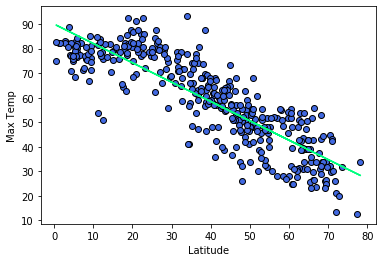

y =-0.79x +90.0
The r-value is: -0.857913423106508


In [274]:
nh_latitudlr(nh_cities["Max Temp"])

*According to the r-value, higher than 0.5, the relationship between the temperature and the latitude in the Northern Hemisphere is strong. Also, this relationship is negative (-0,85). As latitude increases or gets away from 0, the temperature decreases.*

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

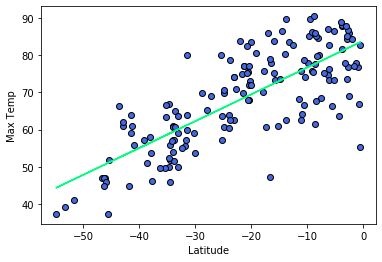

y =0.72x +83.83
The r-value is: 0.775643983006083


In [277]:
sh_latitudlr(sh_cities["Max Temp"])

*According to the r-value, higher than 0.5, the relationship between the temperature and the latitude in the Southern Hemisphere is strong. Also, this relationship is positive(0,77). As latitude increases or gets close to 0, the temperature increases.*

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

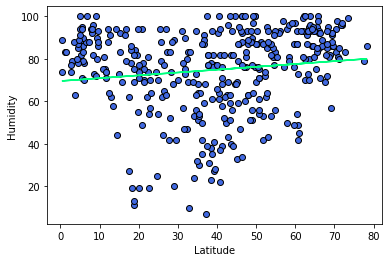

y =0.13x +69.53
The r-value is: 0.13495115577502326


In [267]:
nh_latitudlr(nh_cities["Humidity"])

*According to the r-value, less than 0.5; the relationship between the humidity and the latitude in the Northern Hemisphere is weak. It means that the latitude does not have a high impact on the humidity level in the cities. Also, this relationship is positive(0,13). As latitude increases or gets away from 0, the humidity increase.*

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

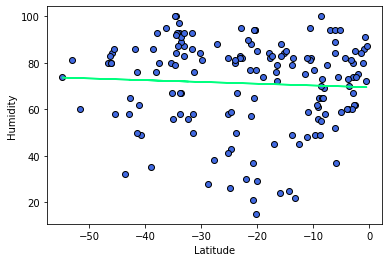

y =-0.08x +69.48
The r-value is: -0.055002691587626135


In [268]:
sh_latitudlr(sh_cities["Humidity"])

*According to the r-value, less than 0.1; there is almost a nonexisting relationship between the humidity and the latitude in the Southern Hemisphere. It means that the latitude does not impact the humidity level in the cities located on that side of the earth.*

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

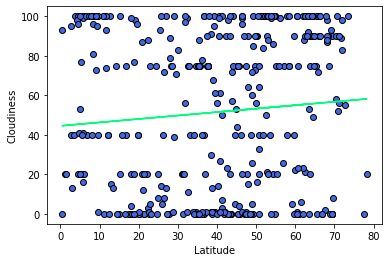

y =0.17x +44.55
The r-value is: 0.08704821179362508


In [269]:
nh_latitudlr(nh_cities["Cloudiness"])

*According to the r-value, less than 0.1; the relationship between the cloudiness and the latitude in the Northern Hemisphere is weak. It means that the latitude does not have a high impact on the cloudiness level in the cities. Also, this relationship is positive(0,08). As latitude increases or gets away from 0, the cloudiness increase.*

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

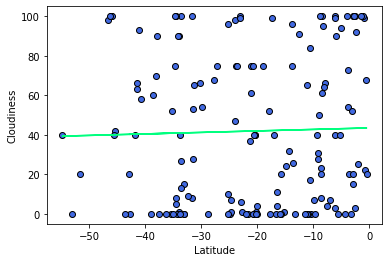

y =0.08x +43.5
The r-value is: 0.027776395853672076


In [270]:
sh_latitudlr(sh_cities["Cloudiness"])

*According to the r-value, less than 0.1; there is almost a nonexisting relationship between the cloudiness and the latitude in the Southern Hemisphere. It means that the latitude does not impact the cloudiness level in the cities located on that side of the earth.*

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

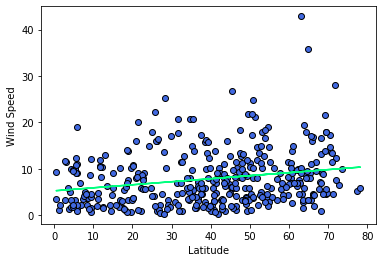

y =0.07x +5.3
The r-value is: 0.22249572300055578


In [271]:
nh_latitudlr(nh_cities["Wind Speed"])

According to the r-value, less than 0.3; the relationship between the wind speed and the latitude in the Northern Hemisphere is weak. It means that the latitude does not have a high impact on the wind speed level in the cities. Also, this relationship is positive(0,22). As latitude increases or gets away from 0, the wind speed increases.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

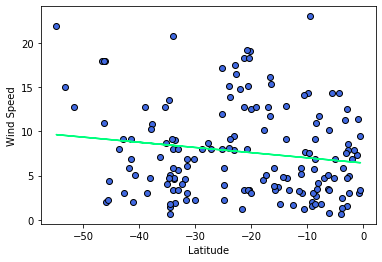

y =-0.06x +6.43
The r-value is: -0.15756876837901132


In [272]:
sh_latitudlr(sh_cities["Wind Speed"])

*According to the r-value, less than 0.3; there is almost a weak relationship between the wind speed and the latitude in the Southern Hemisphere. It means that the latitude does not highly impact the wind speed level in the cities located on that side of the earth.*

## Conclusions

1. The value of the latitude is a crucial fact to determine the temperature of a city. However, it does not interfere    with other aspects of the weather: cloudiness, humidity, wind speed, etc. 


2. It is essential to split the data set into two groups, Northern Hemisphere and  Southern Hemisphere, to better        understand the data and the relation of the different variables with others since they interact differently based      on their side of the earth where the cities are located. 


3. The central tendency measures are not optimum to describe the data, since there is a large variability in the          information. This fact also is reflected in the considerable value of the standard deviation for this dataset. 